<a href="https://colab.research.google.com/github/ucfilho/optim_raianars/blob/master/ANN_parte_002_B_hidrofoil_ajuste_ann_SET_12_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/ucfilho/ANN/ #clonar do Github
%cd ANN
#!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN
Hello world
I'm evolving!!!



In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

def tasig(x,deriv=False):
    if(deriv==True):
        return 1-x*x
    return 2/(1+np.exp(-2*x))-1

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
# leitura dos dados
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
# separa as colunas de interesse
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
#print(Dat_Select)

In [0]:
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [0]:
# obtem as variaveis independentes (treino e teste)
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]
#print(x_train)

In [0]:
# obtem as variaveis dependentes (treino e teste)
#Index=[2,3,4,5]
Index=[2]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
#print(y_train)

In [0]:
# input dataset
#Neuron_input=3
Neuron_input=2
Neuron_hidden=5
Neuron_output=1
Learning_rate=0.01
omega=0.9
Epoch=500000

In [0]:

#y_old=DAT['TC1']
#DAT=normatize(DAT)
Y_train=y_train
X_train=x_train
#print(X.head())

In [11]:
X_NOME=['Hydrofoil','Froude']
Y_NOME=['Resistence']   

X_train=X_train.loc[X_train['Hydrofoil']==X_train['Hydrofoil'],X_NOME].values
y=Y_train.loc[Y_train['Resistence']==Y_train['Resistence'],['Resistence']].values


# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1


for j in range(Epoch):

    # Feed forward through layers 0, 1, and 2
    l0 = X_train
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = purelin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2

    if (j% 10000) == 0:
        print("Epoch %d"%(j) +" error:" + str(np.mean(np.abs(l2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*purelin(l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)*Learning_rate
    syn0 += l0.T.dot(l1_delta)*Learning_rate



Epoch 0 error:0.6557464420612548
Epoch 10000 error:0.10009964276478424
Epoch 20000 error:0.09933218791592324
Epoch 30000 error:0.09899431063924084
Epoch 40000 error:0.09879728739334111
Epoch 50000 error:0.09866470720323907
Epoch 60000 error:0.09856749168838247
Epoch 70000 error:0.09849207825427536
Epoch 80000 error:0.09843122759371102
Epoch 90000 error:0.09838068451141413
Epoch 100000 error:0.09833776134471427
Epoch 110000 error:0.09830066414344807
Epoch 120000 error:0.09826814236579459
Epoch 130000 error:0.09823929333013476
Epoch 140000 error:0.09821344654310743
Epoch 150000 error:0.09819009193216378
Epoch 160000 error:0.09816883351346038
Epoch 170000 error:0.09814935846225449
Epoch 180000 error:0.09813141586734266
Epoch 190000 error:0.09811480177320095
Epoch 200000 error:0.09809934841983188
Epoch 210000 error:0.09808491635402761
Epoch 220000 error:0.09807138854740907
Epoch 230000 error:0.09805866594400237
Epoch 240000 error:0.09804666404373177
Epoch 250000 error:0.09803531024827226
E

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


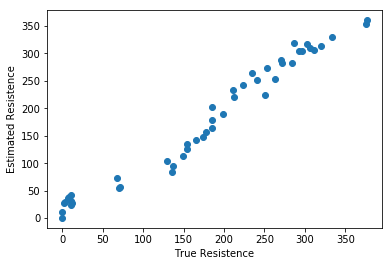

In [12]:
#'''
#DAT=pd.read_csv(Arquivo,sep='\t')
y_obs=y_train
y_calc=np.reshape(l2,len(l2))
y_calc=pd.DataFrame({'y_calc':y_calc})
#y_old=pd.DataFrame({'y_old':y_old})
Y_OLD=pd.DataFrame(Y_OLD)
Y_OLD.columns = ["y_calc"]
y_calc=Original(y_calc,Y_OLD)

y_obs.columns = ["y_calc"]
y_obs=Original(y_obs,Y_OLD)
y_obs_train=np.copy(y_obs)
y_calc_train=np.copy(y_calc)

plt.scatter(y_obs,y_calc)
plt.xlabel("True Resistence")
plt.ylabel("Estimated Resistence")
#plt.xlim((0,1))
#plt.ylim((0,1))
plt.show()
#'''

In [0]:
x_test=x_test.loc[x_test['Hydrofoil']==x_test['Hydrofoil'],X_NOME].values
#y=Y_test.loc[Y_test['Resistence']==Y_test['Resistence'],['Resistence']].values

In [0]:

#print(X_test)
l0 = x_test
l1 = sigmoid(np.dot(l0,syn0))
l2 = purelin(np.dot(l1,syn1))
y_calc_test=np.reshape(l2,len(l2))
y_calc_test=pd.DataFrame({'y_calc':y_calc_test})
y_calc_test=Original(y_calc_test,Y_OLD)

In [15]:
y_obs=y_test
y_obs.columns = ["y_calc"]
y_obs=Original(y_obs,Y_OLD)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


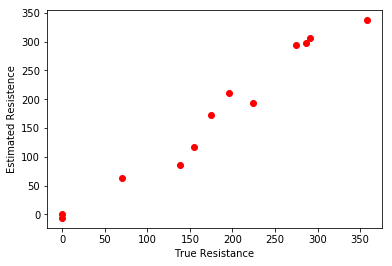

In [16]:
plt.scatter(y_obs,y_calc_test,color='r')
plt.xlabel("True Resistance")
plt.ylabel("Estimated Resistence")
plt.show()

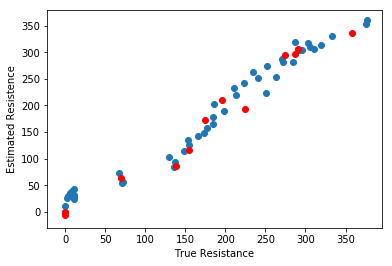

In [17]:
plt.scatter(y_obs_train,y_calc_train)
plt.scatter(y_obs,y_calc_test,color='r')
plt.xlabel("True Resistance")
plt.ylabel("Estimated Resistence")
plt.show()

In [0]:
#print(l1)

In [0]:
#print(l2)